### Kmeans

无监督学习

1.随机选取k个中心点
2.遍历所有数据，将数据划分到最近的类中心点
3.计算所有类的数据的平均值，作为新的聚类中心点
4.重复2-3，直到类中心点不再变化

x(i) 点  
c(i) 点对应的类中心点  
μ(i) 类中心点  

$$c(i)=j\ that\ minimizes\ ||x_i-μ_j||^2$$

$$μ_k=\frac{1}{|C_k|}\sum_{i∈C_k}x_i$$

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
data1=sio.loadmat('./data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
X=data1['X']
X.shape

(300, 2)

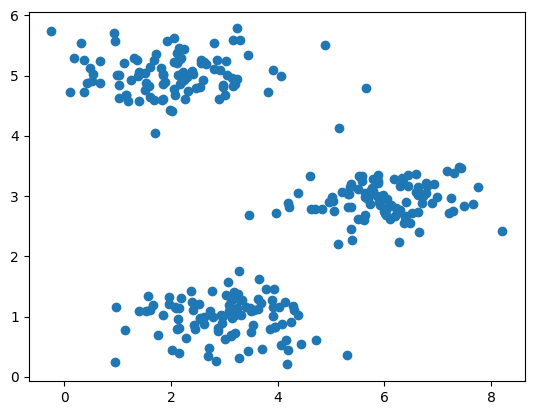

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### 1.获取每个样本所属的类别

centros聚类中心点初始位置

np.linalg.norm计算向量或矩阵的范数，（2-范数，欧氏距离，模长）

In [6]:
def find_centroids(X,centros):
    idx=[]

    for i in range(len(X)):
        #X[i]是(2,) centros是(k,2),自动转换为(k,2)
        dist=np.linalg.norm((X[i]-centros),axis=1)
        id_i=np.argmin(dist)
        idx.append(id_i)

    return np.array(idx)

In [7]:
centros=np.array([[3,3],[6,2],[8,5]])
idx=find_centroids(X,centros)
idx

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0])

### 2.更新聚类中心点

In [8]:
def update_centros(X,idx,k):
    centros=[]
    for i in range(k):
        centros_i=np.mean(X[idx==i],axis=0)
        centros.append(centros_i)
    return np.array(centros)

In [9]:
update_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

### 3.运行kmeans，重复执行1-2

In [10]:
def run_kmeans(X,centros,iters):
    k=len(centros)
    centros_all=[]
    centros_all.append(centros)
    centros_i=centros
    
    for i in range(iters):
        idx=find_centroids(X,centros_i)
        centros_i=update_centros(X,idx,k)
        centros_all.append(centros_i)

    return idx,np.array(centros_all)

绘制数据集和聚类中心点的移动轨迹

centros_all[迭代次数，类别数，特征数]

In [12]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

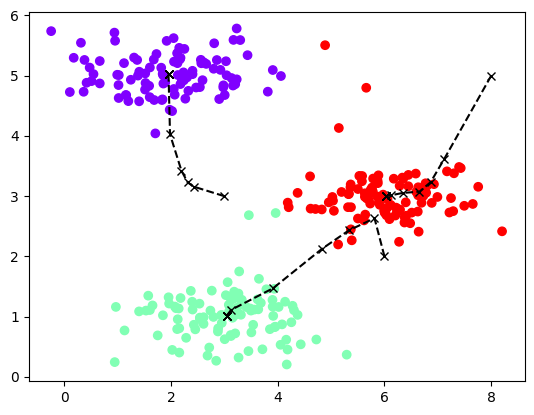

In [14]:
idx,centros_all=run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)

### 观察初始聚类点的位置对聚类效果的影响

In [20]:
# 生成初始聚类点
def init_centros(X,k):
    index=np.random.choice(len(X),k)
    return X[index]

In [21]:
init_centros(X,k=3)

array([[5.57812294, 3.24766016],
       [4.95679428, 2.89776297],
       [3.2645514 , 1.3836869 ]])

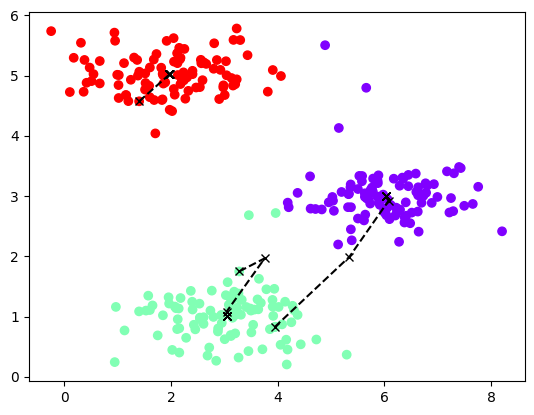

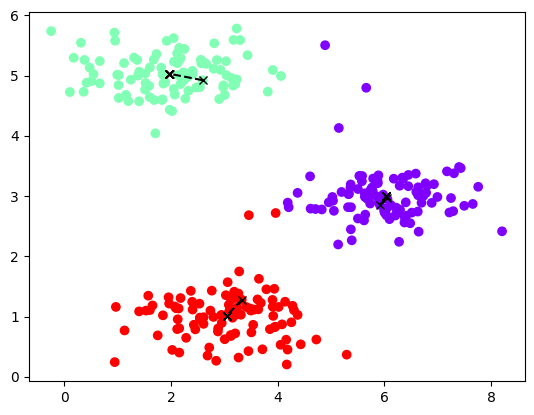

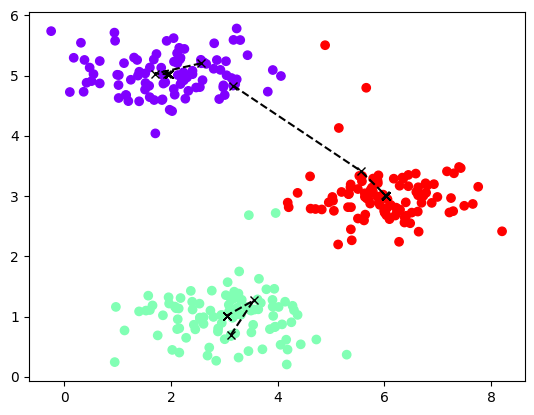

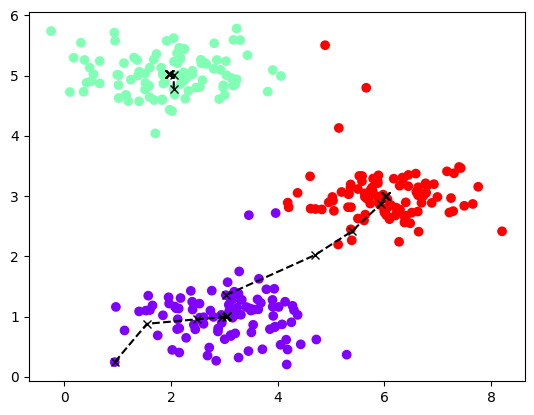

In [22]:
for i in range(4):
    idx,centros_all=run_kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)